In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

1. Подберите парамтеры алгоритма разрастания регионов так, чтобы был выделен весь участок газона.

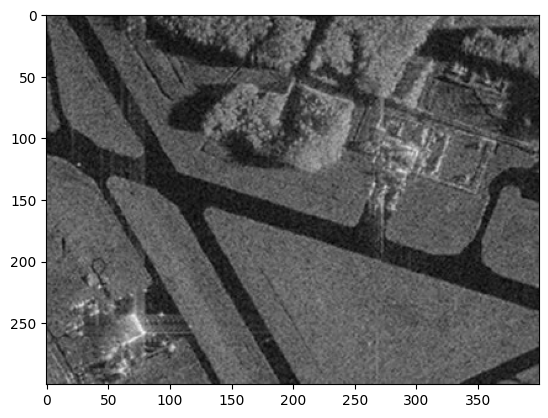

In [5]:
image_path = 'sar_1.jpg'
image = cv2.imread(image_path)

if image is None:
    raise FileNotFoundError(f"Изображение {image_path} не найдено!")

image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image_gray, cmap='gray')
plt.show()

In [6]:
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])

    if abs(av_val - img[point]) <= T:
        return True

    return False

In [7]:
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask

    return mask*255

In [8]:
seed_point = (250,250)
mask = region_growing(image_gray,seed_point,homo_average,5, 25)

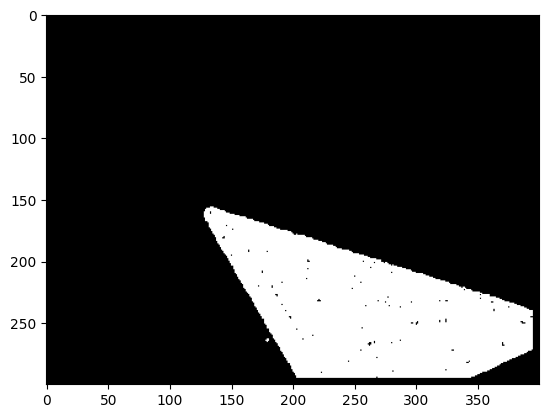

In [10]:
plt.imshow(mask, cmap='gray')
plt.show()

2. Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.

In [11]:
def homo_median(img, mask, point, T):
    median = np.median(img[mask > 0])
    return abs(median - img[point]) <= T

In [12]:
def region_growing(image, seed_point,homo_fun,r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r,image.shape[0] - r):
            for j in range(r,image.shape[1] - r):
                if mask[i,j]==0 and mask[i - r:i + r, j-r: j+r].sum() > 0:
                    if homo_fun(image, mask, (i,j), T):
                        local_mask[i,j] = 1
        count = np.count_nonzero(local_mask)
        print(count)
        mask += local_mask

    return mask*255

182
525
844
1189
1497
1830
1547
1536
1464
1328
1283
1136
1102
1200
1322
1469
1588
1604
1750
1750
1481
1771
1508
1598
1700
2058
2158
2291
1446
1563
1467
1503
1758
1653
1586
1724
1797
1783
1624
1777
1484
454
374
380
444
476
481
1255
402
522
618
680
434
343
341
379
397
366
234
108
68
11
0


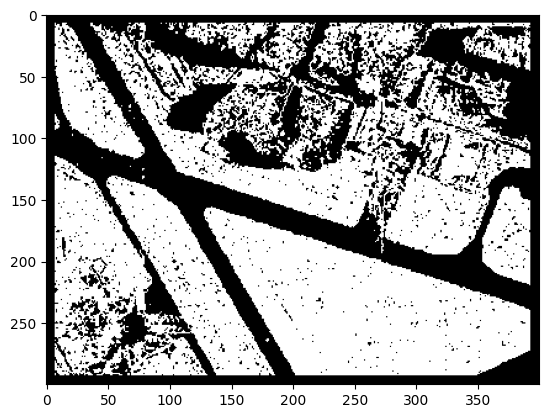

In [13]:
mask2 = region_growing(image_gray,seed_point,homo_median,7, 19)
plt.imshow(mask2, cmap="gray")

In [14]:
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])

    if abs(av_val - img[point]) <= T:
        return True

    return False

In [16]:
seed_point = (100,100)
mask = region_growing(image_gray,seed_point,homo_average,7, 19)

192
340
391
485
576
780
881
847
1043
1239
1463
1497
1463
1762
1879
2012
1822
2026
2018
1440
1707
1377
1610
1434
1292
1409
1435
1537
1667
1956
2915
2569
1981
2312
2415
2531
3190
2402
2475
2399
2316
1628
668
612
519
381
160
55
0


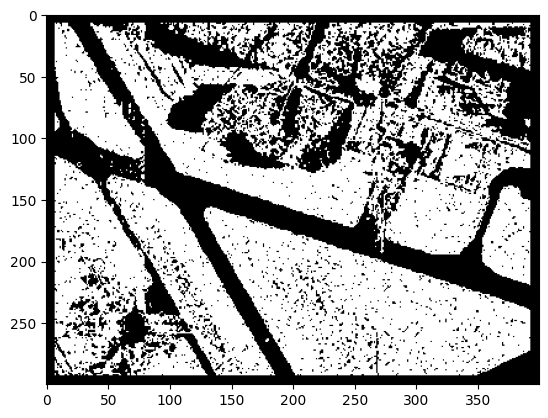

In [17]:
plt.imshow(mask, cmap="gray")

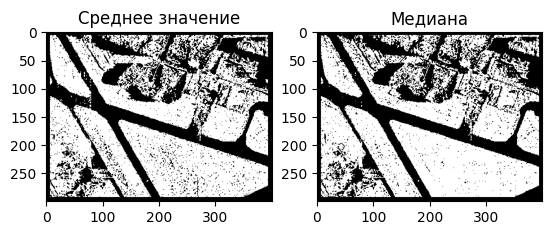

In [18]:
plt.subplot(1,2,1)
plt.imshow(mask, cmap="gray")
plt.title("Среднее значение")
plt.subplot(1,2,2)
plt.title("Медиана")
plt.imshow(mask2, cmap="gray")

3. Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.

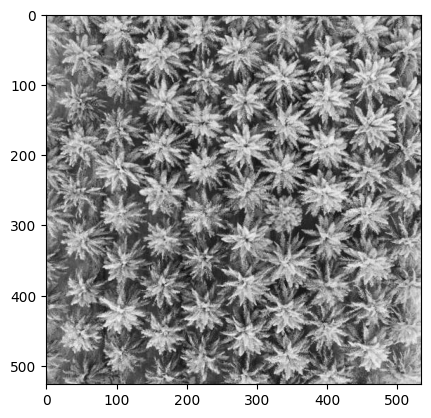

In [19]:
image_path = 'palm_1.JPG'
image_palm = cv2.imread(image_path)

if image_palm is None:
    raise FileNotFoundError(f"Изображение {image_path} не найдено!")

image_palm_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image_palm_gray, cmap='gray')
plt.show()


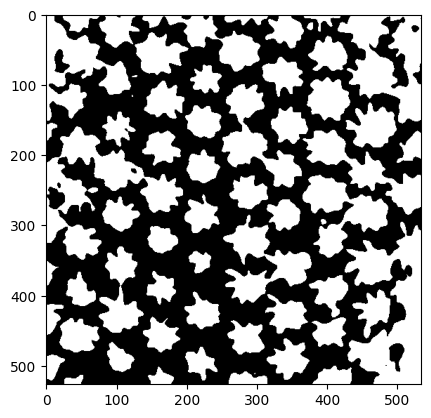

In [20]:
blur = cv2.GaussianBlur(image_palm_gray, (21, 21), 0)
ret, thresh = cv2.threshold(blur,0,255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()

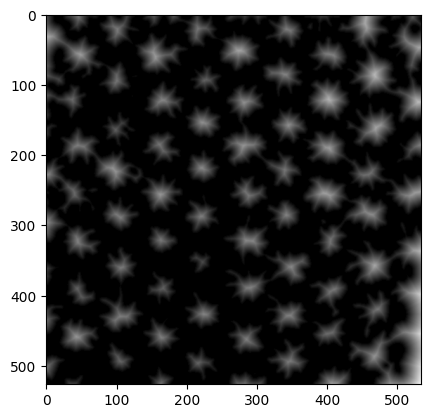

In [21]:
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
plt.imshow(dist, cmap='gray')
plt.show()

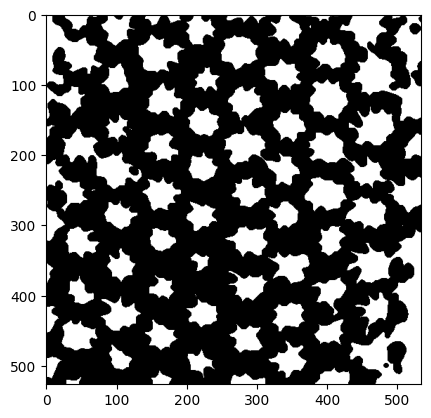

In [22]:
ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
plt.imshow(sure_fg, cmap='gray')
plt.show()

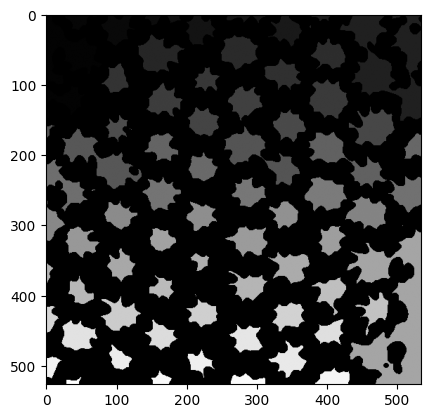

In [23]:
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, cmap='gray')
plt.show()

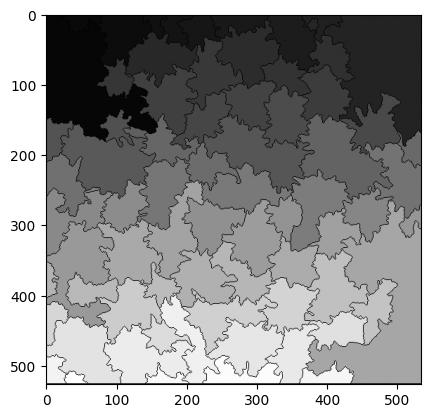

In [24]:
markers = cv2.watershed(image_palm, markers)
plt.imshow(markers, cmap='gray')
plt.show()

In [25]:
count = len(np.unique(markers))
print(f'Найдено {count} пальм (примерное количество)')

Найдено 79 пальм (примерное количество)
